In [1]:
import pandas as pd

# Read the data
courses = pd.read_csv('./data/courses.csv')

courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14178 entries, 0 to 14177
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14178 non-null  object
 1   description  14177 non-null  object
dtypes: object(2)
memory usage: 221.7+ KB


In [2]:
# drop rows with missing values
courses = courses.dropna()

courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14177 entries, 0 to 14177
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14177 non-null  object
 1   description  14177 non-null  object
dtypes: object(2)
memory usage: 332.3+ KB


In [3]:
# drop rows where the description is just "No description."
courses = courses[courses.description != "No description."]
courses.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13791 entries, 0 to 14177
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        13791 non-null  object
 1   description  13791 non-null  object
dtypes: object(2)
memory usage: 323.2+ KB


<AxesSubplot: >

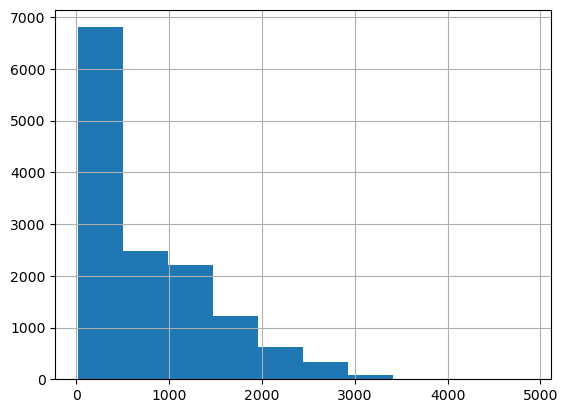

In [36]:
# plot distributiuon of description length
courses['description'].str.len().hist()


<AxesSubplot: >

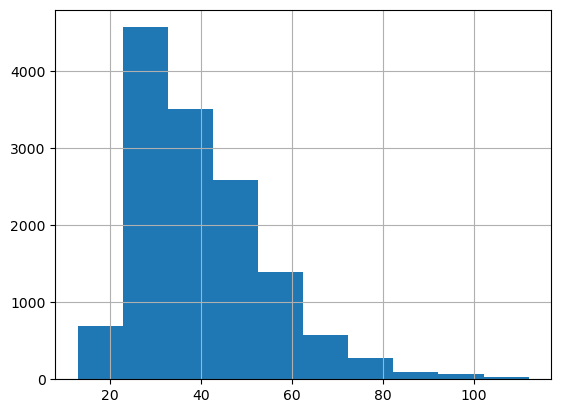

In [35]:
courses['title'].str.len().hist()

In [4]:
# sort dataframe by title
courses = courses.sort_values(by=['title'])
courses.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13791 entries, 10003 to 12945
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        13791 non-null  object
 1   description  13791 non-null  object
dtypes: object(2)
memory usage: 323.2+ KB


In [12]:
# output dataframe to csv
courses.to_csv('./data/courses_cleaned.csv', index=False)


In [29]:


# Extract the first word of each title
first_word = courses['title'].str.split().str.get(0)

# Generate a Boolean mask for the selected rows (80%)
selected = first_word.sample(frac=0.8, random_state=42).index

# Split the DataFrame into two parts based on the selected rows
df_train = courses.loc[selected]
df_train = df_train.sort_values('title')

df_test = courses.drop(selected)


,title,description
0,A-I 801: Foundation of Artificial Intelligence,Artificial Intelligence (AI) is the discipline...
1,A-I 894: Capstone Experience,The capstone course in the MPS in Artificial I...
2,AA 100: Introduction to International Arts,The arts of the world can be simultaneously un...
3,AA 121: Design Thinking and Creativity,"This course is an introductory, general educat..."
4,AA 130N: Creative Arts Therapy Applications,Creative Arts Therapies are intermodal profess...
...,...,...
2753,WWNDS 473: Bassoon: Primary VIII,Individual instruction in bassoon one hour per...
2754,WWNDS 474: Saxophone: Primary VIII,Individual instruction in saxophone one hour p...
2755,WWNDS 481: Oboe: Performance VIII,Individual instruction in oboe one hour per we...
2756,WWNDS 484: Saxophone: Performance VIII,Individual instruction in saxophone one hour p...


In [32]:
# output train and test dataframes to csv
df_train.to_csv('./data/train.csv', index=False)
df_test.to_csv('./data/test.csv', index=False)
    